# <ins>**ANALYSE & VISUALISATION DU DATASET**</ins>

## Analyse fichier Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from scipy.stats.mstats import winsorize
from sklearn.ensemble import IsolationForest

In [196]:
df1 = pd.read_csv("../data/raw/bronze/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

df1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
def clean_column_names(df):
    df.columns = (df.columns.str.strip()
                    .str.lower()
                    .str.replace('[^a-z0-9_]', '_', regex=True))

    return df

df1 = clean_column_names(df1)
column_list = df1.columns.tolist()
print(column_list)

['destination_port', 'flow_duration', 'total_fwd_packets', 'total_backward_packets', 'total_length_of_fwd_packets', 'total_length_of_bwd_packets', 'fwd_packet_length_max', 'fwd_packet_length_min', 'fwd_packet_length_mean', 'fwd_packet_length_std', 'bwd_packet_length_max', 'bwd_packet_length_min', 'bwd_packet_length_mean', 'bwd_packet_length_std', 'flow_bytes_s', 'flow_packets_s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length', 'bwd_header_length', 'fwd_packets_s', 'bwd_packets_s', 'min_packet_length', 'max_packet_length', 'packet_length_mean', 'packet_length_std', 'packet_length_variance', 'fin_flag_count', 'syn_flag_count', 'rst_flag_count', 'psh_flag_count', 'ack_flag_count', 'urg_flag_count', 'cwe_flag_count', 'ece_flag_count

In [168]:
df1.describe()

/home/antoine/miniconda3/envs/logs_project/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/antoine/miniconda3/envs/logs_project/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [169]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   destination_port             225745 non-null  int64  
 1   flow_duration                225745 non-null  int64  
 2   total_fwd_packets            225745 non-null  int64  
 3   total_backward_packets       225745 non-null  int64  
 4   total_length_of_fwd_packets  225745 non-null  int64  
 5   total_length_of_bwd_packets  225745 non-null  int64  
 6   fwd_packet_length_max        225745 non-null  int64  
 7   fwd_packet_length_min        225745 non-null  int64  
 8   fwd_packet_length_mean       225745 non-null  float64
 9   fwd_packet_length_std        225745 non-null  float64
 10  bwd_packet_length_max        225745 non-null  int64  
 11  bwd_packet_length_min        225745 non-null  int64  
 12  bwd_packet_length_mean       225745 non-null  float64
 13 

In [170]:
# verification des nan
def print_columns_with_nan(df):
    """
    Prints the names of columns in a DataFrame that contain NaN values.

    Args:
        df: The pandas DataFrame to check.
    """
    nan_columns = df.columns[df.isnull().any()].tolist()

    if nan_columns:
        print("Columns containing NaN values:")
        for col in nan_columns:
            print(f"- {col}")
    else:
        print("No columns with NaN values found.")

print_columns_with_nan(df1)

Columns containing NaN values:
- flow_bytes/s


In [171]:
# Décompte des Nan colonne flow_bytes
nan_count = df1['flow_bytes/s'].isnull().value_counts()
print(nan_count)

flow_bytes/s
False    225741
True          4
Name: count, dtype: int64


In [172]:
# Suppression des lignes avec des valeurs manquantes
df1 = df1.dropna(axis=0, how='any')
# Suppression des doublons
df1 = df1.drop_duplicates()

In [173]:
# Proportion de notre valeurs cibles
df1['label'].value_counts(normalize=True)

label
DDoS      0.573785
BENIGN    0.426215
Name: proportion, dtype: float64

In [174]:
# Transformation des valeurs cibles en 0 et 1
df1['label'] = df1['label'].apply(lambda x: 0 if x == 'BENIGN' else 1)
df1['label'].value_counts(normalize=True)

label
1    0.573785
0    0.426215
Name: proportion, dtype: float64

In [175]:
# Recherche des valeurs infinies
def print_columns_with_inf(df):
    """
    Affiche les noms des colonnes d'un DataFrame contenant des valeurs infinies.

    Args:
        df: Le DataFrame pandas à vérifier.
    """
    inf_columns = df.columns[np.isinf(df).any()].tolist()

    if inf_columns:
        print("Colonnes contenant des valeurs infinies :")
        for col in inf_columns:
            print(f"- {col}")
    else:
        print("Aucune colonne avec des valeurs infinies trouvée.")

print_columns_with_inf(df1)


Colonnes contenant des valeurs infinies :
- flow_bytes/s
- flow_packets/s


In [176]:
# Sélection des colonnes contenant des valeurs infinies
colonnes_infinies = ['flow_bytes/s', 'flow_packets/s']

# Comptage des valeurs infinies dans chaque colonne
for col in colonnes_infinies:
    count_inf = np.isinf(df1[col]).sum()
    print(f"Nombre de valeurs infinies dans '{col}': {count_inf}")


Nombre de valeurs infinies dans 'flow_bytes/s': 26
Nombre de valeurs infinies dans 'flow_packets/s': 26


In [177]:
# Remplacement des infinis par NaN
df1.replace([np.inf, -np.inf], np.nan, inplace=True)

# Suppression des lignes contenant des infinis
df1.dropna(axis= 0, inplace=True)

## Recherche de corrélation entre nos features

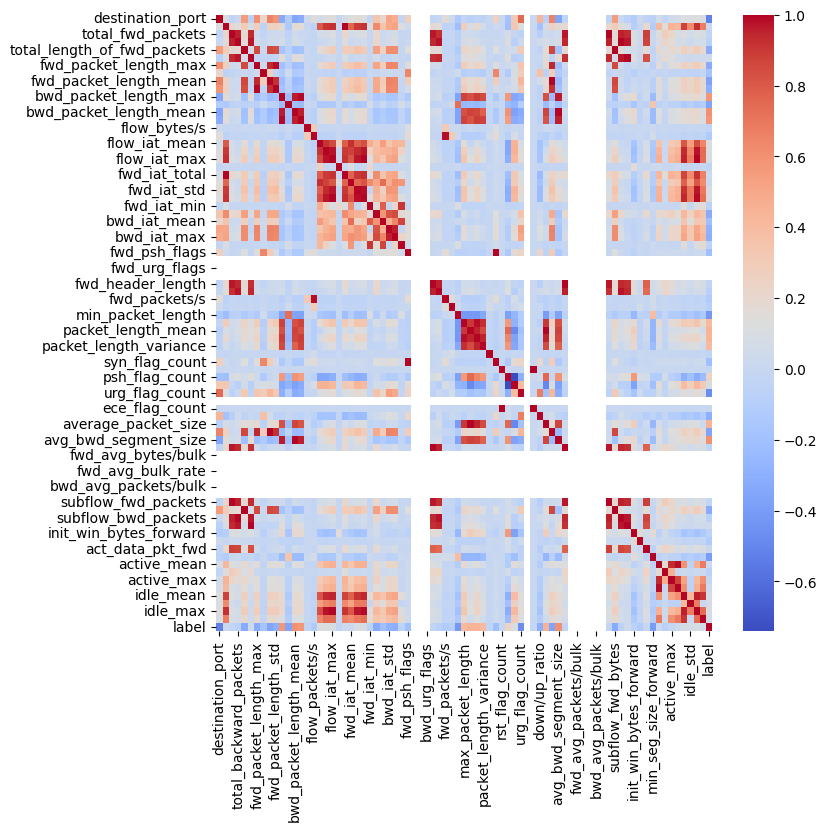

In [195]:
# Heatmap de corrélation des features
cor = df1.corr()
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(cor, ax = ax, cmap = "coolwarm")
plt.show()

**On constate que l'on a plusieurs variables qui semblent très corrélées entre-elles.**

### VISLUALISATION DES OUTLIERS

#### **Choix des colonnes pour le boxplot**

Les colonnes 'Flow Duration', 'Total Fwd Packets' et 'Bwd Packet Length Max' ont été sélectionnées car ce sont des métriques clés pour détecter des anomalies réseau dans notre dataset. 

**Flow Duration**: durée anormale des sessions TCP/UDP - seuil typique d'outlier : > 99.9e percentile (ex: 1e6 ms)

**Total Fwd Packets**: Volume suspect de paquets émis (DDoS/Scan) - seuil typique d'outlier : > 99.5e percentile (ex: 10k paq)

**Bwd Packet Length Max**: Taille maximale inhabituelle des paquets reçus - seuil typique d'outlier : > 99e percentile (ex: 1500 bytes)

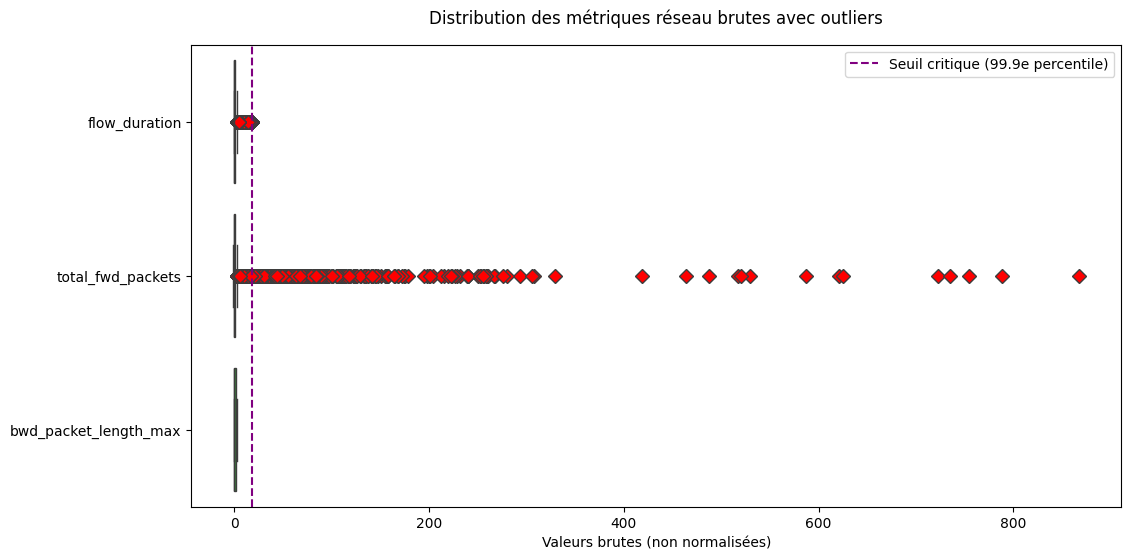

In [ ]:
plt.figure(figsize=(12, 6))

# Boxplot des métriques brutes avec seuil de percentile
sns.boxplot(data=X[['flow_duration', 'total_fwd_packets', 'bwd_packet_length_max']],
            orient='h',
            flierprops=dict(markerfacecolor='r', marker='D', markersize=7))

# Ligne de seuil pour Flow Duration (99.9e percentile)
flow_duration_threshold = np.percentile(X['flow_duration'], 99.9)
plt.axvline(x=flow_duration_threshold,
            color='purple',
            linestyle='--',
            label='Seuil critique (99.9e percentile)')

plt.title("Distribution des métriques réseau brutes avec outliers", pad=15)
plt.xlabel("Valeurs brutes (non normalisées)")
plt.legend()
plt.show()
